### Python Reader For Netcdf files with Subsection Visualization in (Netcdf, Tiff) Formats
#### Ahad Momin (ahadmomin16@gmail.com)
##### [GitHub](https://github.com/AhadMomin) | [Website](http://ahadmomin.github.io) |
#### Supervisor: Christoph Arns & Masa Prodanovic
#### Digital Rock Petrophysics

The python workflow will read the netcdf file and the image arrays will be extracted and stored in Tiff format (IMGAGE J). The arrays can also be vizualized in Python as well as Ncview for Netcdf

The goal of the script is also to subsect the large datasets into smaller files and share it with data developers and researchers through Digital Rock Portal. 

Read what is netCDF(.nc) data : [Click Here](https://desktop.arcgis.com/en/arcmap/latest/manage-data/netcdf/what-is-netcdf-data.htm) |

#### Import Required Packages

We will also need some standard packages. These should have been installed with Anaconda 3. 
You can go to Anaconda Prompt and type:
'pip install netCDF4','pip install tifffile'

#### Load the required libraries

The following code loads the required libraries.


In [1]:
import netCDF4 as ncdf                    # net cdf format files
import numpy as np                        # data fill in 
import matplotlib.pyplot as plt           # For plotting
import matplotlib.image as im             #for slice vizualization
import os                                 # set working directory, run executables
import tifffile as tiff                   # works with tiff formats

#### Set the working directory
The working directory is set to the folder where the data files are stored. Good Practice!

In [2]:
os.chdir("C:/Users/ahadm/Documents/UNSW Research/netcdf data sets/")     

#### Read the Netcdf data files

The most current Netcdf data comprises of Groups,Variables,Attributes and Dimensions (all in one) . All of these needs to be read so we can see understand the data set before we store and create subsections. 

see whats store in the file below:

In [3]:
data = ncdf.Dataset('bnthmr.nc','r')
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    number_of_files: 1
    voxel_size_xyz: [0.0028878 0.0028878 0.0028878]
    voxel_unit: mm
    zdim_range: [  0 399]
    zdim_total: 400
    coordinate_origin_xyz: [800 800 800]
    history_20100327_103319_tomo2048W_SWM: base                    mask
data_directory          /home/561/sxy561/short/data/bnthmr
file_name_suffix        2048W
make_log_files          False
verbosity_level         high

BeginSection MPI
    num_bytes_in_chunk      10000000
    num_processors_x        4
    num_processors_y        5
    num_processors_z        6
EndSection

BeginSection Output_Data_File
    compression             NONE
    format                  NETCDF
    num_mbytes_per_file     256
EndSection

BeginSection Run_00
    enabled                 True
    input_data_type         Tomographic_Data
    run_identifier          
    suffix                  2048W

    BeginSection Shrink_Wrap_Mask
        er

Everything is stored in one file and needs to be filtered before visualizing the image

#### Read Variables in the datasets


In [4]:
for v in data.variables:
    print (v, data.variables[v],data.variables[v].shape)


segmented <class 'netCDF4._netCDF4.Variable'>
int8 segmented(segmented_zdim, segmented_ydim, segmented_xdim)
    data_description: Raw reconstructed tomogram data <ushort>
    valid_range: [0 2]
    _FillValue: -127
unlimited dimensions: 
current shape = (400, 400, 400)
filling on (400, 400, 400)


From this sepecific data it looks like it has a variable named 'segmented', where the array of shape (400,400,400) is stored.

#### Read Dimensions in the datasets
see the coordinate System. Corrdinates are flipped in datasets so you want to make sure to understand how the coordinate system is in the file

In [5]:
for dimobj in data.dimensions.values():
     print(dimobj)

<class 'netCDF4._netCDF4.Dimension'>: name = 'segmented_xdim', size = 400
<class 'netCDF4._netCDF4.Dimension'>: name = 'segmented_ydim', size = 400
<class 'netCDF4._netCDF4.Dimension'>: name = 'segmented_zdim', size = 400


so z = 400, y = 400 and x = 400

#### Read Global Attributes in the datasets

In [6]:
for name in data.ncattrs():
       print("Global attr {} = {}".format(name, getattr(data, name)))

Global attr number_of_files = 1
Global attr voxel_size_xyz = [0.0028878 0.0028878 0.0028878]
Global attr voxel_unit = mm
Global attr zdim_range = [  0 399]
Global attr zdim_total = 400
Global attr coordinate_origin_xyz = [800 800 800]
Global attr history_20100327_103319_tomo2048W_SWM = base                    mask
data_directory          /home/561/sxy561/short/data/bnthmr
file_name_suffix        2048W
make_log_files          False
verbosity_level         high

BeginSection MPI
    num_bytes_in_chunk      10000000
    num_processors_x        4
    num_processors_y        5
    num_processors_z        6
EndSection

BeginSection Output_Data_File
    compression             NONE
    format                  NETCDF
    num_mbytes_per_file     256
EndSection

BeginSection Run_00
    enabled                 True
    input_data_type         Tomographic_Data
    run_identifier          
    suffix                  2048W

    BeginSection Shrink_Wrap_Mask
        erosion_radius          4
       

Global attr history_20100416_131855_segmented2048W_SWM_SMK_SS_AD_UM_RR_CAC_MK_output = 
mango version: <4728>
input dataset ID: 20100416_124451_segmented2048W_SWM_SMK_SS_AD_UM_RR_CAC
input dataset ID: 20100327_105747_tomo2048W_SWM_SMK_SS

Global attr history_20100416_140534_segmented2048W_SWM_SMK_SS_AD_UM_RR_CAC_MK_ASC = base                    full_sample_seg
data_directory          /home/561/fxh561/short/data/bnthmr
file_name_suffix        2048W_SWM_SMK_SS_AD_UM_RR_CAC_MK
make_log_files          False
verbosity_level         high

BeginSection MPI
    num_bytes_in_chunk      10000000
    num_processors_x        4
    num_processors_y        4
    num_processors_z        4
EndSection

BeginSection Output_Data_File
    compression             NONE
    format                  NETCDF
    num_mbytes_per_file     256
EndSection

BeginSection Run_00
    enabled                 False
    input_data_type         Tomographic_Data
    suffix                  2048W_SWM_SMK_SS
EndSection

BeginSe

#### Create variables to store the arrays from the data set
extract and store the array from variable 'segmented'

In [7]:
image= data.variables['segmented'][:]
print(image.shape)

(400, 400, 400)


#### Visualize the stored arrays (The slices can be saved but Matplotlib only saves in 8bit)
to view more slices from 0 to 209, the value in 'range('') can be increased

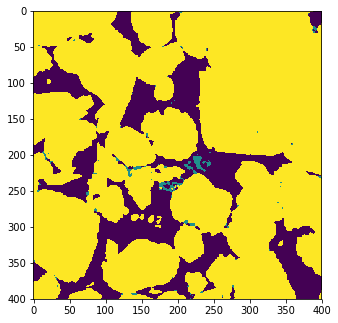

Done!


In [8]:
#for Variable1_data1
plt.ion()                                
for i in range(1):           #the number in the range can be changed to the length of the z corrdinate  
    plt.cla()                           
    plt.imshow(image[i,:,:])      #cmap='gray',vmin=0,vmax=255
    plt.draw()
    plt.axis('on')
#     plt.savefig('%05d.tiff'%i,bbox_inches='tight',dpi= 1000, quality=95 )
    plt.subplots_adjust(left=0, bottom=0.0, right=2.0, top=1.0, wspace=0.4, hspace=0.3)
    plt.pause(0.05) 
plt.ioff()                              
print('Done!')

#### Save Nc Array into Volumetric Tiff file

In [9]:
tiff.imwrite('bnthmr.tiff', image.astype(np.uint8), compress = 6, imagej=True,
metadata={'Variable': print('Variable:',v),'subsectsize':print('New_Subsect_Shape:',image.shape),'metadata/History': print('datadump/history:',data)})
print(image.dtype)

Variable: segmented
New_Subsect_Shape: (400, 400, 400)
datadump/history: <class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    number_of_files: 1
    voxel_size_xyz: [0.0028878 0.0028878 0.0028878]
    voxel_unit: mm
    zdim_range: [  0 399]
    zdim_total: 400
    coordinate_origin_xyz: [800 800 800]
    history_20100327_103319_tomo2048W_SWM: base                    mask
data_directory          /home/561/sxy561/short/data/bnthmr
file_name_suffix        2048W
make_log_files          False
verbosity_level         high

BeginSection MPI
    num_bytes_in_chunk      10000000
    num_processors_x        4
    num_processors_y        5
    num_processors_z        6
EndSection

BeginSection Output_Data_File
    compression             NONE
    format                  NETCDF
    num_mbytes_per_file     256
EndSection

BeginSection Run_00
    enabled                 True
    input_data_type         Tomographic_Data
    run_identifier          
    su

int8


Go see your working directory and the bnthmr.tiff image will be there!!

#### Creating Subsections of the data

Input the coordinates of subsection you need corrdinates are flipped in data sets so you want to make sure to understand how the corrdinate system is in the file. I am slicing the image in all directions



In [10]:
New_slice = image[0:200,0:200,0:200]            # input the z,y,x coordinates

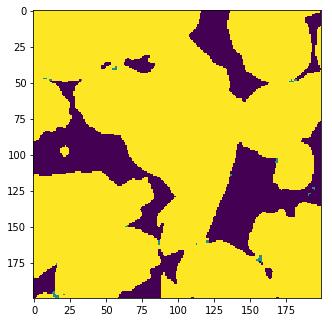

Done!


In [11]:
plt.ion()                                
for i in range(1):           #the number in the range can be changed to the length of the z corrdinate  
    plt.cla()                           
    plt.imshow(New_slice[i,:,:])      #cmap='gray',vmin=0,vmax=255
    plt.draw()
    plt.axis('on')
#     plt.savefig('%05d.tiff'%i,bbox_inches='tight',dpi= 1000, quality=95 )
    plt.subplots_adjust(left=0, bottom=0.0, right=2.0, top=1.0, wspace=0.4, hspace=0.3)
    plt.pause(0.05) 
plt.ioff()                              
print('Done!')

#### Save slices of subsections in Volumetric Tiff

In [12]:
tiff.imwrite('New_slice.tiff', New_slice, imagej=False,
metadata={'Variable': print('Variable:',v),'subsectsize':print('New_Subsect_Shape:',New_slice.shape),'metadata/History': print('datadump/history:',data)})

Variable: segmented
New_Subsect_Shape: (200, 200, 200)
datadump/history: <class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    number_of_files: 1
    voxel_size_xyz: [0.0028878 0.0028878 0.0028878]
    voxel_unit: mm
    zdim_range: [  0 399]
    zdim_total: 400
    coordinate_origin_xyz: [800 800 800]
    history_20100327_103319_tomo2048W_SWM: base                    mask
data_directory          /home/561/sxy561/short/data/bnthmr
file_name_suffix        2048W
make_log_files          False
verbosity_level         high

BeginSection MPI
    num_bytes_in_chunk      10000000
    num_processors_x        4
    num_processors_y        5
    num_processors_z        6
EndSection

BeginSection Output_Data_File
    compression             NONE
    format                  NETCDF
    num_mbytes_per_file     256
EndSection

BeginSection Run_00
    enabled                 True
    input_data_type         Tomographic_Data
    run_identifier          
    su

### Creating a Netcdf Format file for the new sliced Array
(File Size Reduced)
A bit tricky but the following steps are taken.
##### Coverting back to Netcdf api have bugs in the python API so restart and run the kernal if you get any error

1)Open/create a netCDF dataset.(create group as well)

2)Define the dimensions of the data.

3)Construct netCDF variables using the defined dimensions.

4)Pass data into the netCDF variables.

5)Add attributes to the variables and dataset (optional but recommended).

6)Close the netCDF dataset.


I am only storing one subsected array (New_slice) from data
#### 1)Open/create a netCDF dataset.(create group as well)


In [13]:
f = ncdf.Dataset('New_Slice.nc','w', format='NETCDF4')

In [14]:
drpgrp = f.createGroup('Digital_Rock_Petrophysics')

#### 2)Define the dimensions of the data.
Assign the shapes of the subsected z,y,x cordinates. Make sure not to flip

In [15]:
drpgrp.createDimension('new_slice_z', New_slice.shape[0])
drpgrp.createDimension('new_slice_y', New_slice.shape[1])
drpgrp.createDimension('new_slice_x', New_slice.shape[2])

<class 'netCDF4._netCDF4.Dimension'>: name = 'new_slice_x', size = 200

#### 3)Construct netCDF variables using the defined dimensions.
'i' for integer
'f' for float
to compress the file turn zlib = 'True'

In [16]:
Segmented_Slice = drpgrp.createVariable('Segmented_Slice', 'f4', ('new_slice_z','new_slice_y','new_slice_x'),zlib=False)

In [17]:
print(f)
print(f.groups['Digital_Rock_Petrophysics'])

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: Digital_Rock_Petrophysics
<class 'netCDF4._netCDF4.Group'>
group /Digital_Rock_Petrophysics:
    dimensions(sizes): new_slice_z(200), new_slice_y(200), new_slice_x(200)
    variables(dimensions): float32 Segmented_Slice(new_slice_z,new_slice_y,new_slice_x)
    groups: 


#### 4)Pass data into the netCDF variables.


In [18]:
Segmented_Slice[:] = New_slice
print(Segmented_Slice)

<class 'netCDF4._netCDF4.Variable'>
float32 Segmented_Slice(new_slice_z, new_slice_y, new_slice_x)
path = /Digital_Rock_Petrophysics
unlimited dimensions: 
current shape = (200, 200, 200)
filling on, default _FillValue of 9.969209968386869e+36 used


#### 5)Add attributes to the variables and dataset (optional but recommended).
description of the data can be added here

In [19]:
from datetime import datetime
today = datetime.today()
f.description = "Subsectioned Data"
f.history = "Created " + today.strftime("%d/%m/%y")
f.valid_range: [0,2]
f.FillValue: -127 
#Add local attributes to variable instances
Segmented_Slice.units = 'unlimited dimensions'

#### 6)Close the netCDF dataset.
The file is subsection of the file is created

In [20]:
f.close()

Read the file that you created to double check

In [21]:
f = ncdf.Dataset('New_slice.nc','r')
drpgrp = f.groups['Digital_Rock_Petrophysics']

print ("meta data for the dataset:")
print(f)
print ("meta data for the Digital_Rock_Petrophysics group:")
print(drpgrp)
print ("meta data for segmented_subsection01 variable:")
print(drpgrp.variables)

meta data for the dataset:
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: Subsectioned Data
    history: Created 23/06/20
    dimensions(sizes): 
    variables(dimensions): 
    groups: Digital_Rock_Petrophysics
meta data for the Digital_Rock_Petrophysics group:
<class 'netCDF4._netCDF4.Group'>
group /Digital_Rock_Petrophysics:
    dimensions(sizes): new_slice_z(200), new_slice_y(200), new_slice_x(200)
    variables(dimensions): float32 Segmented_Slice(new_slice_z,new_slice_y,new_slice_x)
    groups: 
meta data for segmented_subsection01 variable:
{'Segmented_Slice': <class 'netCDF4._netCDF4.Variable'>
float32 Segmented_Slice(new_slice_z, new_slice_y, new_slice_x)
    units: unlimited dimensions
path = /Digital_Rock_Petrophysics
unlimited dimensions: 
current shape = (200, 200, 200)
filling on, default _FillValue of 9.969209968386869e+36 used}


### Netcdf file is successfull created and NCview can be used to visualize the file. Image J can be used to analyze  Tiff formats

Contact Ahad Momin (ahadmomin16@gmail.com) for any help with the code